In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [14]:
dataset_clean = pd.read_csv('datasets/cleaned_games_data.csv')

In [15]:
# Taille de l'échantillon (par exemple, 10%)
# sample_fraction = 0.1  # 10% des données

# Sous-échantillonnage
# dataset_clean = dataset_clean.sample(frac=sample_fraction, random_state=42)

In [16]:
X = dataset_clean.drop(columns=['price'])
y = dataset_clean['price']

In [17]:
# Diviser en jeu d'entraînement et jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Appliquer PCA pour réduire la dimensionnalité (garder 95% de la variance)
pca = PCA(n_components=0.50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [18]:
features = [
    'estimated_owners', 'peak_ccu', 'required_age', 'dlc_count', 'support_windows',
    'support_mac', 'support_linux', 'metacritic_score', 'positive_reviews',
    'negative_reviews', 'average_playtime_forever', 'age_of_game', 'nb_languages'
]
target = 'price'

In [19]:
X = dataset_clean[features]
y = dataset_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(7041, 682)
(1761, 682)


In [21]:
print("Nombre de composantes après PCA:", X_train_pca.shape[1])


Nombre de composantes après PCA: 99


In [22]:
# Liste des modèles à tester
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    # "Support Vector Regressor": SVR(),
    # "K-Nearest Neighbors": KNeighborsRegressor()
}


In [23]:
# Dictionnaire pour stocker les performances
results = {"Model": [], "MSE": [], "R2": [], "MAE": []}

# Entraînement et évaluation des modèles
for model_name, model in models.items():
    # Entraînement du modèle
    model.fit(X_train_pca, y_train)
    
    # Prédictions sur le jeu de test
    y_pred = model.predict(X_test_pca)
    
    # Calcul des métriques de performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Stocker les résultats
    results["Model"].append(model_name)
    results["MSE"].append(mse)
    results["R2"].append(r2)
    results["MAE"].append(mae)

# Créer un DataFrame pour afficher les résultats
results_df = pd.DataFrame(results)
# Afficher les résultats des différents modèles
print(results_df)

# Trouver le meilleur modèle en fonction de l'indicateur choisi (par exemple, MSE le plus bas)
best_model = results_df.loc[results_df["MSE"].idxmin()]
print("Meilleur modèle basé sur MSE :")
print(best_model)

               Model         MSE        R2       MAE
0  Linear Regression  112.572631 -0.001702  5.960164
1      Random Forest  114.474127 -0.018622  6.281542
2  Gradient Boosting  111.868480  0.004564  5.902129
Meilleur modèle basé sur MSE :
Model    Gradient Boosting
MSE              111.86848
R2                0.004564
MAE               5.902129
Name: 2, dtype: object


In [ ]:
import joblib

# Sauvegarder le modèle
joblib.dump(best_model, 'models/best_model_gradient_boosting_17_00.pkl')

# Charger le modèle
# loaded_model = joblib.load('models/best_model_gradient_boosting_17_00.pkl')

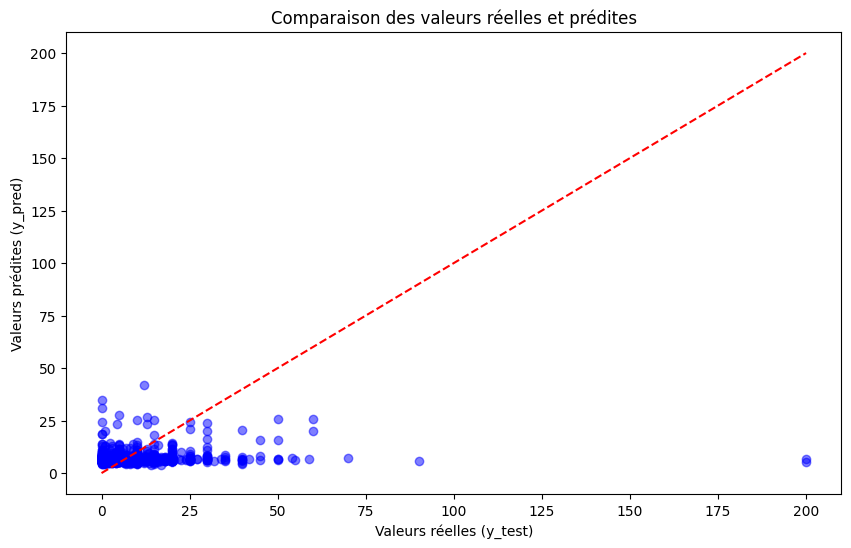

In [28]:
import matplotlib.pyplot as plt

# Tracer les vraies valeurs vs les prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Valeurs prédites (y_pred)")
plt.title("Comparaison des valeurs réelles et prédites")
plt.show()

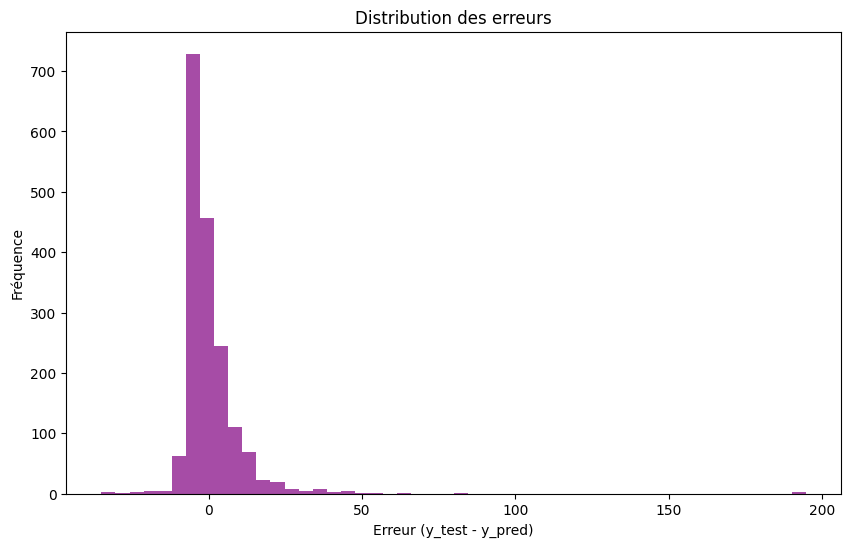

In [29]:
# Calculer les erreurs
errors = y_test - y_pred

# Tracer la distribution des erreurs
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='purple', alpha=0.7)
plt.xlabel("Erreur (y_test - y_pred)")
plt.ylabel("Fréquence")
plt.title("Distribution des erreurs")
plt.show()